In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import aseegg as ag
import numpy as np
import ast
import copy
import statistics

In [2]:
df = pd.read_csv('moje_dane_kot2.txt',names = ['signal','time'])

In [3]:
# wycięcie słowa "start" z sygnału
# zamiana typu zmiennej sygnału na floaty

signal = df[df.signal != 'start']['signal'].astype(float)

In [4]:
length = len(signal)
t = np.linspace(0, length/200, length)

Text(0, 0.5, 'Apmlituda [uV]')

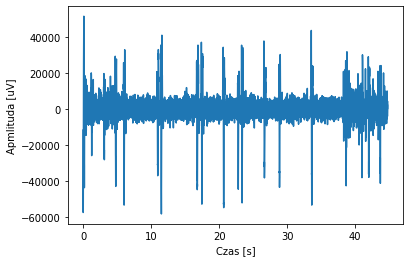

In [5]:
# Cały sygnał

plt.plot(t, signal)
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [6]:
#wczytywanie z pliku czasow wyswietlania liter (timetable), czasow przerw na mruganie (delay timetable)
#oraz czasu operacji przed pętla gry(t0)
with open('czasy_kot2.txt') as f:
    lines = f.read().splitlines()
t0 = int(lines[1])
timetable = ast.literal_eval(lines[3])
delay_timetable = ast.literal_eval(lines[5])

In [7]:
#sztucznie zwiekszamy probkowanie do 1000Hz: 1 pomiar na 1ms by przefiltrowac sygnal pod katem czasow wczytanych z list
signal_fin=[]
for x in signal:
    signal_fin.extend([x]*5)

In [8]:
#start rzeczywisty to t0+3000 co wynika ze sposobu napisania kodu w pygame - operacje wywolywane sa tam na zasadzie
#pygame event wywolywanego co 1000ms. Przed startem pomiaru wywolywany jest dodatkowy cykl
#dodatkowe opoznienie 3s + 1s zwiazana z cyklem wywolan
#eventu w pygame + 0.25 t0
#pomiar zaczynamy wiec od 4.25: poczatku pierwszego odliczania
#po poprawce +3s

In [9]:
print(t0)
print("\n")
print(timetable)
print("\n")
print(delay_timetable)

257


[(3258, 4258), (4259, 5257), (5258, 6257), (6258, 7258), (9258, 10258), (10259, 11258), (11260, 12259), (12260, 13259), (15259, 16258), (16259, 17258), (17259, 18258), (18259, 19258), (21259, 22258), (22259, 23259), (23260, 24259), (24259, 25259), (27259, 28258), (28259, 29258), (29259, 30258), (30259, 31258), (33259, 34259)]


[(1258, 3258), (7258, 9258), (13259, 15259), (19258, 21259), (25259, 27259), (31258, 33259)]


In [10]:
#FRAGMENT
#na ukazanym ponizej fragmecie widac, iz pojawilo sie nieoczekiwane, dodatkowe opoznienie - badanie zamiast zaczynac sie
#w czasie 3250 zaczyna sie dokladnie 3000ms pozniej - po 6 sekundzie. Dokladne opoznienie 3s nie jest tu przypadkowa 
#wartoscią - najprawdopodobniej wynika ze sposobu w jaki zostalo napisane wyswietlanie w pygame.
#wszelkie operacje wywolywane sa tam na zasadzie pygame event aktywowanego co 1000ms.
#Juz przy testowaniu programu do wyswietlania zauwazylismy iz jest to pewna przypadlosc pygame i jego
#przebiegu opartego na eventach - przykkladowo przy szybkim poruszaniu myszką,
#co rejstrowane jest jako kilka roznych eventow(rejstrowana jest zarowno pozycja myszki jak i opuszczenie okna i inne),
#zaobserwowalismy podobne mozliwe opoznienia w wyswietlaniu, niewynikajace z kodu. Oczywiście zablokowalismy w kodzie
#eventy związane z rejstrowaniem parametrow kursora oraz kilka innych, niewykluczone jednak iż jest to problem podobnej natury.
#Mozliwe wiec, iz jest to chociazby kwestia rownoleglego rejstrowania sygnalu czy tez innych nieprzewidzianych operacji.
#Prawdopodobnie więc jest to kwestia dokładnie 3 pustych cykli eventu wyswietlajacego letery, ktory aktywowany jest
#co dokladnie 1000ms. Przyjmujemy więc takie założenie, gdyż w pełni wyjaśniałoby ono otrzymane wartosci.
#w następnym kroku korygujemy wiec czasy przerw i wyswietlania o dodatkowe 3000ms

Text(0, 0.5, 'Apmlituda [uV]')

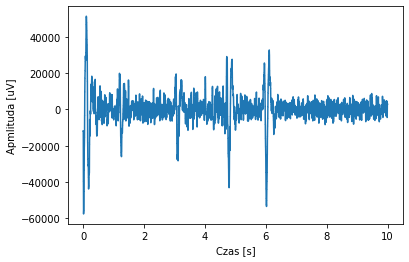

In [11]:
s0 = 0
s = 10
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_fin[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [12]:
#korekta +3000ms
timetable_list = []
delay_timetable_list = []
delay = 3000

for x in timetable:
    timetable_list.append((x[0]+delay,x[1]+delay))

for x in delay_timetable:
    delay_timetable_list.append((x[0]+delay,x[1]+delay))

In [13]:
#poczatkowe odliczanie w kodzie jest rowniez zakodowane jako przerwa miedzy literami, tak wiec litery
#beda sie wyswietlac po zakonczeniu pierwszego opoznienia(odpoczynku na mruganie) z delay_timetable_list

In [14]:
#zerujemy sygnal w miejscach odpoczynkow na mruganie oraz przed pierwszym - byl to czas na przygotowanie przed 
#ropoczeciem wyswietlania
for i in range(len(signal_fin)):
    if i < delay_timetable_list[0][0]:
        signal_fin[i] = 0
    else:
        for x in delay_timetable_list:
            if i > x[0] and i < x[1]:
                signal_fin[i] = 0

In [15]:
#ucinamy sygnal rowniez z tylu, po zakonczeniu zadania
signal_fin = signal_fin[0:delay_timetable_list[-1][1]]
print(len(signal_fin))

36259


In [16]:
print(timetable)
print("\n")
print(delay_timetable)

[(3258, 4258), (4259, 5257), (5258, 6257), (6258, 7258), (9258, 10258), (10259, 11258), (11260, 12259), (12260, 13259), (15259, 16258), (16259, 17258), (17259, 18258), (18259, 19258), (21259, 22258), (22259, 23259), (23260, 24259), (24259, 25259), (27259, 28258), (28259, 29258), (29259, 30258), (30259, 31258), (33259, 34259)]


[(1258, 3258), (7258, 9258), (13259, 15259), (19258, 21259), (25259, 27259), (31258, 33259)]


Text(0, 0.5, 'Apmlituda [uV]')

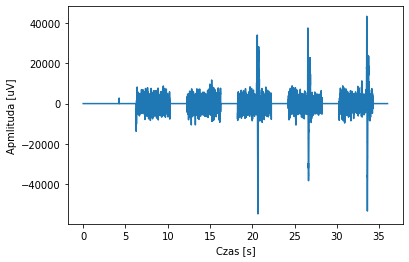

In [17]:
#WYSWIETLANIE CALEGO SYGNALU PO KOREKCIE I ZEROWANIU SYGNALU W PRZERWACH
s0 = 0
s = 36
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_fin[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [18]:
#sposob 1. prosty, bazujacy jedynie na przekroczeniu granicznej wartosci sygnalu. Po znalezienu litery,
#za pomoca break przeskakujemy do nastepnego interwalu

In [19]:
letters1 = []
a = 0
for t in timetable_list:
    for x in signal_fin[t[0]:t[1]]:
        if x > 20000:
            letters1.append(chr(97+(a%26)))
            break
    a += 1

In [20]:
letters1

['k', 'o', 't']

In [21]:
#sposob 2 z uzyciem usrednych wartosci sygnalu dla litery - oddzielnie dodatnich i ujemnych,
#a następnie porownywanie ich z ogolna srednia dodatnia i ujemna.
#w przypadku spelnienia obu warunkow litera dopisywana jest do listy
#metoda ta jest wiarygodniejsza dla roznie zaszumionych sygnalow - selekcja odbywa się na bazie usrednionych,
#a nie suchych wartosci

meanpos = 0
sumpos = 0
lenpos = 0

meanneg = 0
sumneg = 0
lenneg = 0

for x in signal_fin:
    if x>0:
        sumpos += x
        lenpos += 1
    elif x<0:
        sumneg += x
        lenneg += 1
meanpos = sumpos/lenpos
meanneg = sumneg/lenneg

In [22]:
mean_list = []
meanposl = 0
meannegl = 0

for t in timetable_list[:-1]: #nie bierzemy pod uwage ostatniego rekordu gdyz przedstawia on zaszumiony sygnal po wykonaniu zadania
    sumposl = 0
    sumnegl = 0
    lenposl = 0
    lennegl = 0
    for x in signal_fin[t[0]:t[1]]:
        if x>0:
            sumposl += x
            lenposl += 1
        elif x<0:
            sumnegl += x
            lennegl += 1
    meanposl = sumposl/lenposl
    meannegl = sumnegl/lennegl
    mean_list.append((meanposl,meannegl))

In [23]:
letters2 = []
for x in range(len(mean_list)):
    if mean_list[x][0]>meanpos and mean_list[x][1]<meanneg:
        letters2.append(chr(97+(x%26)))

In [24]:
letters2

['k', 'o', 't']

In [25]:
#sposob 3: szukamy charakterystycznego ksztaltu amplitudy - silnego wzrostu wiekszego niz przecietne odchylenie dodatnie(t+50ms),
#po ktorym nastepuje silny spadek wiekszy niz przecietne odchylenie ujemne(t+150ms), po ktorym ponownie obserwujemy
#silny wzrost sygnalu(t+300)
#w kwestii optymalizacji skupilismy sie rowniez na tym sposobie, gdyz wydaje sie najbardziej odporny na przypadkowe wykrycia
#jednoczesnie wymagajac mniej operacji iteracji po zbiorze - po znalezieniu wzrostu sprawdzamy czy wystepuje spadek i ponowny
#wzrost w okreslonych odstepach, w przypadku znalezienia go przeskakujemy do nastepnej litery

Text(0, 0.5, 'Apmlituda [uV]')

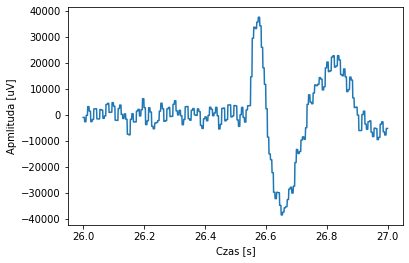

In [26]:
#FRAGMENT pomagajacy przesledzic czasowo wzrost i spadek wartosci
s0 = 26
s = 27
t2 = np.linspace(s0,s,(s-s0)*1000)

plt.plot(t2, signal_fin[s0*1000:s*1000])
plt.xlabel('Czas [s]')
plt.ylabel('Apmlituda [uV]')

In [27]:
a = 0
letters3 = []

for t in timetable_list[:-1]:
    found = False
    i = t[0]
    while i < t[1]:
        if signal_fin[i] > 1.5*meanpos:
            if signal_fin[i+150-15] < 1.5*meanneg:
                if signal_fin[i+300-15] > 1.5*meanpos:
                    letters3.append(chr(97+(a%26)))
                    break
        i += 1
    a += 1

In [28]:
letters3

['k', 'o', 't']

In [29]:
#zeby nie polegac na pojedynczych wartosciach mozemy skonstruowac wokol oczekiwanych szczytow wzrostu i spadku
#przedzialy +-10s i porownywac tak otrzymane srednie
#odejmujemy od wartosci rowniez 15ms, gdyz zakladamy ze dopiero po takim czasie od t zdarzenia nastapi
#wykrycie wzrostu x1.5 wzgledem sredniej

In [30]:
a = 0
letters4 = []

for t in timetable_list[:-1]:
    found = False
    i = t[0]
    while i < t[1]:
        if signal_fin[i] > 1.5*meanpos:
            if sum(signal_fin[i+125:i+145])/20 < 1.5*meanneg: #wszystko -15 i do tego przedzial +-10 a wiec 135+-10  285+-10
                if sum(signal_fin[i+275:i+295])/20 > 1.5*meanpos:
                    letters4.append(chr(97+(a%26)))
                    break
        i += 1
    a += 1

In [31]:
letters4

['k', 'o', 't']